# Car Price Prediction Project

        With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

In [1]:
#Let's import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file
df=pd.read_csv('Carwale Used Cars data.csv')
df

,Unnamed: 0,Car Name,Year,Kilometers,Fuel,Location,EMI,Price
0,0,Mercedes-Benz M-Class ML 350 CDI,2015,"76,345 km",Diesel,Gurgaon,"EMI starts at₹44,588",26.85 Lakh
1,1,Maruti Suzuki Ignis Delta 1.2 AMT,2019,"38,386 km",Petrol,Gurgaon,"EMI starts at₹8,776",5.29 Lakh
2,2,Maruti Suzuki Swift Lxi ABS (O),2017,"18,001 km",Petrol,Delhi,"EMI starts at₹8,054",4.85 Lakh
3,3,Mahindra Thar LX 4-STR Convertible Diesel AT,2021,"5,000 km",Diesel,Delhi,"EMI starts at₹29,725",17.9 Lakh
4,4,Hyundai Eon Era +,2012,"57,718 km",Petrol,Noida,"EMI starts at₹3,653",2.2 Lakh
...,...,...,...,...,...,...,...,...
9995,9995,MINI Cooper Countryman Cooper D,2022,"3,000 km",Petrol,Gurgaon,"EMI starts at₹32,798",7.3 Lakh
9996,9996,Audi A6 Technology 45 TFSI,2022,"82,000 km",Petrol,Gurgaon,"EMI starts at₹58,123",3.35 Lakh
9997,9997,MG Hector Sharp 2.0 Diesel Turbo MT,2019,"16,500 km",Petrol,Gurgaon,"EMI starts at₹29,725",5.35 Lakh
9998,9998,Jaguar XE Prestige,2017,950 km,Diesel,Delhi,EMI starts at₹1.33 L,3.1 Lakh


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   Car Name    10000 non-null  object
 2   Year        10000 non-null  int64 
 3   Kilometers  10000 non-null  object
 4   Fuel        10000 non-null  object
 5   Location    10000 non-null  object
 6   EMI         10000 non-null  object
 7   Price       10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


# Features Description

Car Name : Name of the Car

Year : Car Manufactured Year
    
Kilometers : Kilometers run my car

Fuel : Fuel used by car

Location : Location of the car

EMI : EMI of the car

Price : Selling price of the car

In [4]:
df[["Brand_Name","Car_Name"]] = df["Car Name"].str.split(' ',n=1,expand=True)
df

,Unnamed: 0,Car Name,Year,Kilometers,Fuel,Location,EMI,Price,Brand_Name,Car_Name
0,0,Mercedes-Benz M-Class ML 350 CDI,2015,"76,345 km",Diesel,Gurgaon,"EMI starts at₹44,588",26.85 Lakh,Mercedes-Benz,M-Class ML 350 CDI
1,1,Maruti Suzuki Ignis Delta 1.2 AMT,2019,"38,386 km",Petrol,Gurgaon,"EMI starts at₹8,776",5.29 Lakh,Maruti,Suzuki Ignis Delta 1.2 AMT
2,2,Maruti Suzuki Swift Lxi ABS (O),2017,"18,001 km",Petrol,Delhi,"EMI starts at₹8,054",4.85 Lakh,Maruti,Suzuki Swift Lxi ABS (O)
3,3,Mahindra Thar LX 4-STR Convertible Diesel AT,2021,"5,000 km",Diesel,Delhi,"EMI starts at₹29,725",17.9 Lakh,Mahindra,Thar LX 4-STR Convertible Diesel AT
4,4,Hyundai Eon Era +,2012,"57,718 km",Petrol,Noida,"EMI starts at₹3,653",2.2 Lakh,Hyundai,Eon Era +
...,...,...,...,...,...,...,...,...,...,...
9995,9995,MINI Cooper Countryman Cooper D,2022,"3,000 km",Petrol,Gurgaon,"EMI starts at₹32,798",7.3 Lakh,MINI,Cooper Countryman Cooper D
9996,9996,Audi A6 Technology 45 TFSI,2022,"82,000 km",Petrol,Gurgaon,"EMI starts at₹58,123",3.35 Lakh,Audi,A6 Technology 45 TFSI
9997,9997,MG Hector Sharp 2.0 Diesel Turbo MT,2019,"16,500 km",Petrol,Gurgaon,"EMI starts at₹29,725",5.35 Lakh,MG,Hector Sharp 2.0 Diesel Turbo MT
9998,9998,Jaguar XE Prestige,2017,950 km,Diesel,Delhi,EMI starts at₹1.33 L,3.1 Lakh,Jaguar,XE Prestige


In [5]:
#Lets drop off  unnecessary columns
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Car Name,Year,Kilometers,Fuel,Location,EMI,Price,Brand_Name,Car_Name
0,Mercedes-Benz M-Class ML 350 CDI,2015,"76,345 km",Diesel,Gurgaon,"EMI starts at₹44,588",26.85 Lakh,Mercedes-Benz,M-Class ML 350 CDI
1,Maruti Suzuki Ignis Delta 1.2 AMT,2019,"38,386 km",Petrol,Gurgaon,"EMI starts at₹8,776",5.29 Lakh,Maruti,Suzuki Ignis Delta 1.2 AMT
2,Maruti Suzuki Swift Lxi ABS (O),2017,"18,001 km",Petrol,Delhi,"EMI starts at₹8,054",4.85 Lakh,Maruti,Suzuki Swift Lxi ABS (O)
3,Mahindra Thar LX 4-STR Convertible Diesel AT,2021,"5,000 km",Diesel,Delhi,"EMI starts at₹29,725",17.9 Lakh,Mahindra,Thar LX 4-STR Convertible Diesel AT
4,Hyundai Eon Era +,2012,"57,718 km",Petrol,Noida,"EMI starts at₹3,653",2.2 Lakh,Hyundai,Eon Era +
...,...,...,...,...,...,...,...,...,...
9995,MINI Cooper Countryman Cooper D,2022,"3,000 km",Petrol,Gurgaon,"EMI starts at₹32,798",7.3 Lakh,MINI,Cooper Countryman Cooper D
9996,Audi A6 Technology 45 TFSI,2022,"82,000 km",Petrol,Gurgaon,"EMI starts at₹58,123",3.35 Lakh,Audi,A6 Technology 45 TFSI
9997,MG Hector Sharp 2.0 Diesel Turbo MT,2019,"16,500 km",Petrol,Gurgaon,"EMI starts at₹29,725",5.35 Lakh,MG,Hector Sharp 2.0 Diesel Turbo MT
9998,Jaguar XE Prestige,2017,950 km,Diesel,Delhi,EMI starts at₹1.33 L,3.1 Lakh,Jaguar,XE Prestige


Since we have split data from Car Name column lets drop off 'Car Name' Column

In [6]:
#Lets drop off  unnecessary columns
df.drop('Car Name',axis=1,inplace=True)
df

,Year,Kilometers,Fuel,Location,EMI,Price,Brand_Name,Car_Name
0,2015,"76,345 km",Diesel,Gurgaon,"EMI starts at₹44,588",26.85 Lakh,Mercedes-Benz,M-Class ML 350 CDI
1,2019,"38,386 km",Petrol,Gurgaon,"EMI starts at₹8,776",5.29 Lakh,Maruti,Suzuki Ignis Delta 1.2 AMT
2,2017,"18,001 km",Petrol,Delhi,"EMI starts at₹8,054",4.85 Lakh,Maruti,Suzuki Swift Lxi ABS (O)
3,2021,"5,000 km",Diesel,Delhi,"EMI starts at₹29,725",17.9 Lakh,Mahindra,Thar LX 4-STR Convertible Diesel AT
4,2012,"57,718 km",Petrol,Noida,"EMI starts at₹3,653",2.2 Lakh,Hyundai,Eon Era +
...,...,...,...,...,...,...,...,...
9995,2022,"3,000 km",Petrol,Gurgaon,"EMI starts at₹32,798",7.3 Lakh,MINI,Cooper Countryman Cooper D
9996,2022,"82,000 km",Petrol,Gurgaon,"EMI starts at₹58,123",3.35 Lakh,Audi,A6 Technology 45 TFSI
9997,2019,"16,500 km",Petrol,Gurgaon,"EMI starts at₹29,725",5.35 Lakh,MG,Hector Sharp 2.0 Diesel Turbo MT
9998,2017,950 km,Diesel,Delhi,EMI starts at₹1.33 L,3.1 Lakh,Jaguar,XE Prestige


Lets split 'EMI' Column

In [12]:
df["EMI"].str.split('₹',n=1)

0       [EMI starts at, 44,588]
1        [EMI starts at, 8,776]
2        [EMI starts at, 8,054]
3       [EMI starts at, 29,725]
4        [EMI starts at, 3,653]
                 ...           
9995    [EMI starts at, 32,798]
9996    [EMI starts at, 58,123]
9997    [EMI starts at, 29,725]
9998    [EMI starts at, 1.33 L]
9999    [EMI starts at, 89,676]
Name: EMI, Length: 10000, dtype: object

In [14]:
split_EMI = df["EMI"].str.split('₹',n=1,expand=True).rename(columns={0:'None',1:'EMI Amount'})
split_EMI

,None,EMI Amount
0,EMI starts at,"44,588"
1,EMI starts at,"8,776"
2,EMI starts at,"8,054"
3,EMI starts at,"29,725"
4,EMI starts at,"3,653"
...,...,...
9995,EMI starts at,"32,798"
9996,EMI starts at,"58,123"
9997,EMI starts at,"29,725"
9998,EMI starts at,1.33 L


In [18]:
df[["None","EMI Amount"]] = df["EMI"].str.split('₹',n=1,expand=True)
df

,Year,Kilometers,Fuel,Location,EMI,Price,Brand_Name,Car_Name,EMI Amount,None
0,2015,"76,345 km",Diesel,Gurgaon,"EMI starts at₹44,588",26.85 Lakh,Mercedes-Benz,M-Class ML 350 CDI,"44,588",EMI starts at
1,2019,"38,386 km",Petrol,Gurgaon,"EMI starts at₹8,776",5.29 Lakh,Maruti,Suzuki Ignis Delta 1.2 AMT,"8,776",EMI starts at
2,2017,"18,001 km",Petrol,Delhi,"EMI starts at₹8,054",4.85 Lakh,Maruti,Suzuki Swift Lxi ABS (O),"8,054",EMI starts at
3,2021,"5,000 km",Diesel,Delhi,"EMI starts at₹29,725",17.9 Lakh,Mahindra,Thar LX 4-STR Convertible Diesel AT,"29,725",EMI starts at
4,2012,"57,718 km",Petrol,Noida,"EMI starts at₹3,653",2.2 Lakh,Hyundai,Eon Era +,"3,653",EMI starts at
...,...,...,...,...,...,...,...,...,...,...
9995,2022,"3,000 km",Petrol,Gurgaon,"EMI starts at₹32,798",7.3 Lakh,MINI,Cooper Countryman Cooper D,"32,798",EMI starts at
9996,2022,"82,000 km",Petrol,Gurgaon,"EMI starts at₹58,123",3.35 Lakh,Audi,A6 Technology 45 TFSI,"58,123",EMI starts at
9997,2019,"16,500 km",Petrol,Gurgaon,"EMI starts at₹29,725",5.35 Lakh,MG,Hector Sharp 2.0 Diesel Turbo MT,"29,725",EMI starts at
9998,2017,950 km,Diesel,Delhi,EMI starts at₹1.33 L,3.1 Lakh,Jaguar,XE Prestige,1.33 L,EMI starts at


Lets drop off 'None' Column

In [19]:
df.drop('None',axis=1,inplace=True)

In [20]:
df.drop('EMI',axis=1,inplace=True)

In [21]:
df

,Year,Kilometers,Fuel,Location,Price,Brand_Name,Car_Name,EMI Amount
0,2015,"76,345 km",Diesel,Gurgaon,26.85 Lakh,Mercedes-Benz,M-Class ML 350 CDI,"44,588"
1,2019,"38,386 km",Petrol,Gurgaon,5.29 Lakh,Maruti,Suzuki Ignis Delta 1.2 AMT,"8,776"
2,2017,"18,001 km",Petrol,Delhi,4.85 Lakh,Maruti,Suzuki Swift Lxi ABS (O),"8,054"
3,2021,"5,000 km",Diesel,Delhi,17.9 Lakh,Mahindra,Thar LX 4-STR Convertible Diesel AT,"29,725"
4,2012,"57,718 km",Petrol,Noida,2.2 Lakh,Hyundai,Eon Era +,"3,653"
...,...,...,...,...,...,...,...,...
9995,2022,"3,000 km",Petrol,Gurgaon,7.3 Lakh,MINI,Cooper Countryman Cooper D,"32,798"
9996,2022,"82,000 km",Petrol,Gurgaon,3.35 Lakh,Audi,A6 Technology 45 TFSI,"58,123"
9997,2019,"16,500 km",Petrol,Gurgaon,5.35 Lakh,MG,Hector Sharp 2.0 Diesel Turbo MT,"29,725"
9998,2017,950 km,Diesel,Delhi,3.1 Lakh,Jaguar,XE Prestige,1.33 L


# Features


Year: Manufacture year of car

Kilometers : Kilometers run my car

Fuel : Fuel used by car

Location : Location of the car

Price : Selling price of the car

Brand_Name : Brand Name of car

Car_Name : Name of the Car

EMI Amount : EMI of the car

In [22]:
df['Year'].unique()

array([2015, 2019, 2017, 2021, 2012, 2018, 2020, 2013, 2014, 2009, 2011,
       2008, 2022, 2016, 2007, 2010], dtype=int64)

In [23]:
df['Kilometers'].unique()

array(['76,345 km', '38,386 km', '18,001 km', '5,000 km', '57,718 km',
       '89,000 km', '13,200 km', '20,000 km', '90,826 km', '49,769 km',
       '45,876 km', '48,502 km', '30,632 km', '55,314 km', '21,469 km',
       '56,000 km', '55,200 km', '86,000 km', '52,360 km', '39,584 km',
       '74,600 km', '49,700 km', '82,200 km', '64,300 km', '78,304 km',
       '55,000 km', '50,047 km', '68,000 km', '41,700 km', '62,224 km',
       '65,000 km', '63,000 km', '40,000 km', '76,000 km', '32,467 km',
       '93,000 km', '10,000 km', '15,000 km', '14,500 km', '43,500 km',
       '25,500 km', '9,800 km', '18,500 km', '3,000 km', '82,000 km',
       '16,500 km', '950 km', '32,000 km', '85,000 km', '35,000 km',
       '70,000 km', '19,000 km', '47,000 km', '8,800 km', '38,000 km',
       '1,500 km', '1,10,000 km', '45,000 km', '11,000 km', '46,000 km',
       '58,000 km', '3,800 km', '6,200 km', '29,000 km', '59,000 km',
       '17,000 km', '30,000 km', '33,000 km', '13,000 km', '43,000 km',


Although every columns has unique values but driven kilometer is an important feature for our machine to understand

In [24]:
df['Fuel'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

"Fuel" Column looks fine

In [25]:
df['Location'].unique()

array(['Gurgaon', 'Delhi', 'Noida', 'Faridabad', 'Ahmedabad'],
      dtype=object)

In [26]:
df['Price'].unique()

array(['26.85 Lakh', '5.29 Lakh', '4.85 Lakh', '17.9 Lakh', '2.2 Lakh',
       '30 Lakh', '10.25 Lakh', '12.5 Lakh', '4.9 Lakh', '5.95 Lakh',
       '5.2 Lakh', '4 Lakh', '2.95 Lakh', '3.95 Lakh', '2.55 Lakh',
       '4.5 Lakh', '2.9 Lakh', '3.4 Lakh', '2.45 Lakh', '4.75 Lakh',
       '6.15 Lakh', '7.3 Lakh', '3.35 Lakh', '5.35 Lakh', '3.1 Lakh',
       '4.25 Lakh', '2.6 Lakh', '2.7 Lakh', '39 Lakh', '1.95 Lakh',
       '27 Lakh', '20 Lakh', '17.4 Lakh', '25 Lakh', '2.51 Lakh',
       '3.35 Crore', '47.75 Lakh', '15.99 Lakh', '49 Lakh', '1.25 Crore',
       '1.68 Crore', '39.5 Lakh', '48.5 Lakh', '1.49 Crore', '10.75 Lakh',
       '78 Lakh', '1.38 Crore', '1.61 Crore', '32.5 Lakh', '21.5 Lakh',
       '24.5 Lakh', '23.5 Lakh', '39.9 Lakh', '23.45 Lakh', '61.9 Lakh',
       '10.7 Lakh', '59.5 Lakh', '9.85 Lakh', '40.95 Lakh', '15.75 Lakh',
       '35 Lakh', '42 Lakh', '64.5 Lakh', '48 Lakh', '26.75 Lakh',
       '77.8 Lakh', '93 Lakh', '32 Lakh', '69 Lakh', '53.5 Lakh',
       '1.35 Cro

"Price" columns has unique vlues which is important for us

In [27]:
df['Brand_Name'].unique()

array(['Mercedes-Benz', 'Maruti', 'Mahindra', 'Hyundai', 'Volvo', 'Jeep',
       'Volkswagen', 'Honda', 'Toyota', 'Ford', 'BMW', 'Audi', 'MG',
       'Land', 'MINI', 'Bentley', 'Porsche', 'Jaguar', 'Kia', 'Skoda',
       'Mitsubishi'], dtype=object)

In [28]:
df['Car_Name'].unique()

array(['M-Class ML 350 CDI', 'Suzuki Ignis Delta 1.2 AMT',
       'Suzuki Swift Lxi ABS (O)', 'Thar LX 4-STR Convertible Diesel AT',
       'Eon Era +', 'S90 D4 Inscription',
       'Verna Fluidic 1.6 VTVT SX Opt AT', 'Compass Sport 1.4 Petrol',
       'Polo Highline1.2L (P)', 'City V',
       'Elite i20 Magna 1.2 [2016-2017]', 'Suzuki Wagon R 1.0 VXI',
       'Brio S MT', 'Grand i10 Sportz (O) 1.2 Kappa VTVT [2017-2018]',
       'Suzuki Alto 800 Lxi CNG', 'Amaze 1.2 S i-VTEC',
       'Grand i10 Magna 1.2 Kappa VTVT [2013-2016]', 'Camry W1 MT',
       'Suzuki Eeco 5 STR WITH A/C+HTR CNG [2017-2019]', 'i20 Magna 1.2',
       'TUV300 T8 mHAWK100 Dual Tone', 'Glanza G',
       'Suzuki Swift ZXi Plus [2018-2019]', 'Suzuki Swift DZire LDI',
       'Suzuki Swift Dzire LXI (O)', 'Suzuki Alto 800 Lxi',
       'EcoSport Titanium 1.5L Ti-VCT AT', 'i10 Sportz 1.2 Kappa2',
       'Verna Fluidic 1.6 VTVT SX', 'C-Class C 220 CDI Avantgarde',
       'Suzuki Alto K10 VXi', 'X1 sDrive20d M Sport',
    

In [29]:
df['EMI Amount'].unique()

array(['44,588', '8,776', '8,054', '29,725', '3,653', '17,021', '8,137',
       '9,880', '8,635', '6,642', '6,559', '4,234', '7,473', '4,815',
       '5,646', '7,888', '4,898', '10,213', '12,122', '5,563', '8,884',
       '5,148', '7,057', '4,317', '4,483', '64,766', '3,238', '44,838',
       '28,895', '41,516', '4,168', '5.56 L', '79,296', '26,554',
       '81,372', '2.08 L', '65,596', '2.47 L', '17,852', '1.3 L',
       '2.29 L', '53,971', '35,704', '49,820', '40,686', '39,025',
       '66,260', '38,942', '1.03 L', '17,769', '98,809', '16,357',
       '68,004', '26,155', '58,123', '69,748', '1.07 L', '79,712',
       '44,422', '1.29 L', '1.54 L', '53,141', '1.15 L', '88,845',
       '2.24 L', '1.38 L', '90,506', '93,827', '74,314', '71,408',
       '86,354', '1.08 L', '2.74 L', '1.05 L', '1.24 L', '73,069',
       '77,221', '1.14 L', '32,383', '82,867', '36,368', '2.52 L',
       '99,474', '67,257', '66,426', '90,091', '65,430', '55,466',
       '1.09 L', '1.33 L', '1.18 L', '97,149'

In [30]:
df

,Year,Kilometers,Fuel,Location,Price,Brand_Name,Car_Name,EMI Amount
0,2015,"76,345 km",Diesel,Gurgaon,26.85 Lakh,Mercedes-Benz,M-Class ML 350 CDI,"44,588"
1,2019,"38,386 km",Petrol,Gurgaon,5.29 Lakh,Maruti,Suzuki Ignis Delta 1.2 AMT,"8,776"
2,2017,"18,001 km",Petrol,Delhi,4.85 Lakh,Maruti,Suzuki Swift Lxi ABS (O),"8,054"
3,2021,"5,000 km",Diesel,Delhi,17.9 Lakh,Mahindra,Thar LX 4-STR Convertible Diesel AT,"29,725"
4,2012,"57,718 km",Petrol,Noida,2.2 Lakh,Hyundai,Eon Era +,"3,653"
...,...,...,...,...,...,...,...,...
9995,2022,"3,000 km",Petrol,Gurgaon,7.3 Lakh,MINI,Cooper Countryman Cooper D,"32,798"
9996,2022,"82,000 km",Petrol,Gurgaon,3.35 Lakh,Audi,A6 Technology 45 TFSI,"58,123"
9997,2019,"16,500 km",Petrol,Gurgaon,5.35 Lakh,MG,Hector Sharp 2.0 Diesel Turbo MT,"29,725"
9998,2017,950 km,Diesel,Delhi,3.1 Lakh,Jaguar,XE Prestige,1.33 L


In [31]:
df['Year'].value_counts()

2017    1506
2021    1368
2018    1254
2019    1126
2020     975
2014     808
2015     746
2013     532
2016     515
2022     448
2011     235
2012     171
2008     158
2009      82
2007      38
2010      38
Name: Year, dtype: int64

In [32]:
df['Kilometers'].value_counts()

32,000 km      442
15,000 km      289
40,000 km      206
45,000 km      204
47,000 km      202
              ... 
68,800 km       38
1,959 km        38
1,33,000 km     38
59,500 km       38
39,000 km       38
Name: Kilometers, Length: 135, dtype: int64

Although every columns has unique values but driven kilometer is an important feature for our machine to understand

In [33]:
df['Fuel'].value_counts()

Diesel    5281
Petrol    4631
CNG         88
Name: Fuel, dtype: int64

In [34]:
df['Location'].value_counts()

Delhi        6661
Gurgaon      1473
Ahmedabad    1300
Faridabad     390
Noida         176
Name: Location, dtype: int64

In [35]:
df['Price'].value_counts()

17.9 Lakh     162
30 Lakh       127
53.5 Lakh     123
25 Lakh       123
48 Lakh       121
             ... 
72 Lakh        38
11.56 Lakh     38
78.57 Lakh     38
24.26 Lakh     38
22.88 Lakh     38
Name: Price, Length: 192, dtype: int64

In [36]:
df['Brand_Name'].value_counts()

Mercedes-Benz    2974
BMW               957
Audi              944
Hyundai           670
Maruti            600
Land              555
Porsche           486
Ford              447
Mahindra          333
Toyota            325
Honda             294
Volvo             246
MG                240
Jaguar            238
Volkswagen        207
MINI              197
Bentley            83
Kia                80
Jeep               44
Skoda              40
Mitsubishi         40
Name: Brand_Name, dtype: int64

In [37]:
df['Car_Name'].value_counts()

E-Class E 220d Exclusive [2019-2019]    366
E-Class E 220 d Avantgarde              317
CLA 200 CDI Sport                       199
GLS 400d 4MATIC                         161
Thar LX 4-STR Convertible Diesel AT     127
                                       ... 
6 Series GT 630d M Sport [2018-2019]     38
A4 Technology 40 TFSI [2021-2022]        38
7 Series 730Ld Sedan                     37
Q5 2.0 TDI quattro Premium Plus          37
E-Class E250 CDI Avantgarde              37
Name: Car_Name, Length: 179, dtype: int64

In [38]:
df['EMI Amount'].value_counts()

1.38 L    191
29,725    144
88,845    144
41,516    143
79,712    141
         ... 
63,719     44
38,290     44
1.2 L      44
40,287     44
37,996     44
Name: EMI Amount, Length: 166, dtype: int64

# Null Values

Price columns looks fine which is important feature for us

In [39]:
#Lets check for null values
df.isnull().sum()

Year          0
Kilometers    0
Fuel          0
Location      0
Price         0
Brand_Name    0
Car_Name      0
EMI Amount    0
dtype: int64

There are no null values

In [40]:
df

,Year,Kilometers,Fuel,Location,Price,Brand_Name,Car_Name,EMI Amount
0,2015,"76,345 km",Diesel,Gurgaon,26.85 Lakh,Mercedes-Benz,M-Class ML 350 CDI,"44,588"
1,2019,"38,386 km",Petrol,Gurgaon,5.29 Lakh,Maruti,Suzuki Ignis Delta 1.2 AMT,"8,776"
2,2017,"18,001 km",Petrol,Delhi,4.85 Lakh,Maruti,Suzuki Swift Lxi ABS (O),"8,054"
3,2021,"5,000 km",Diesel,Delhi,17.9 Lakh,Mahindra,Thar LX 4-STR Convertible Diesel AT,"29,725"
4,2012,"57,718 km",Petrol,Noida,2.2 Lakh,Hyundai,Eon Era +,"3,653"
...,...,...,...,...,...,...,...,...
9995,2022,"3,000 km",Petrol,Gurgaon,7.3 Lakh,MINI,Cooper Countryman Cooper D,"32,798"
9996,2022,"82,000 km",Petrol,Gurgaon,3.35 Lakh,Audi,A6 Technology 45 TFSI,"58,123"
9997,2019,"16,500 km",Petrol,Gurgaon,5.35 Lakh,MG,Hector Sharp 2.0 Diesel Turbo MT,"29,725"
9998,2017,950 km,Diesel,Delhi,3.1 Lakh,Jaguar,XE Prestige,1.33 L


In [41]:
df.describe()

,Year
count,10000.000000
mean,2017.259500
std,3.204432
min,2007.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2022.000000


<AxesSubplot:xlabel='Year', ylabel='count'>

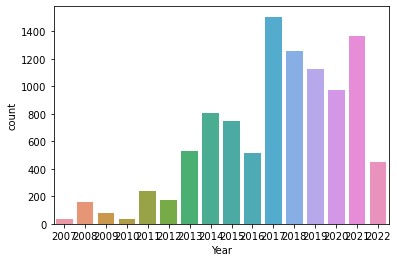

In [43]:
sns.countplot(df['Year'])

<AxesSubplot:xlabel='Kilometers', ylabel='count'>

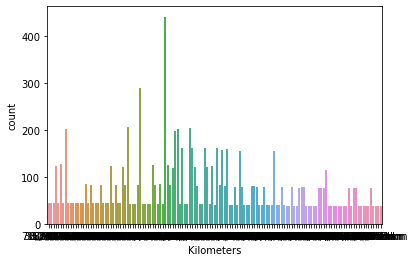

In [44]:
sns.countplot(df['Kilometers'])

<AxesSubplot:xlabel='Fuel', ylabel='count'>

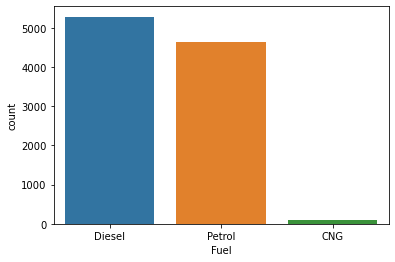

In [45]:
sns.countplot(df['Fuel'])

<AxesSubplot:xlabel='Location', ylabel='count'>

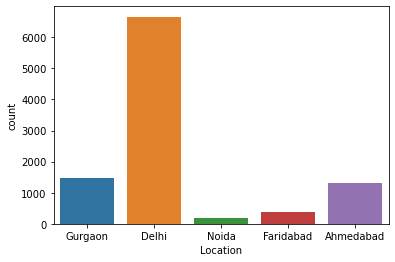

In [46]:
sns.countplot(df['Location'])

<AxesSubplot:xlabel='Price', ylabel='count'>

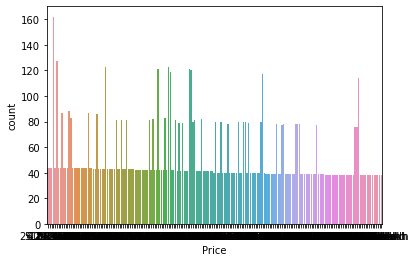

In [47]:
sns.countplot(df['Price'])

<AxesSubplot:xlabel='Brand_Name', ylabel='count'>

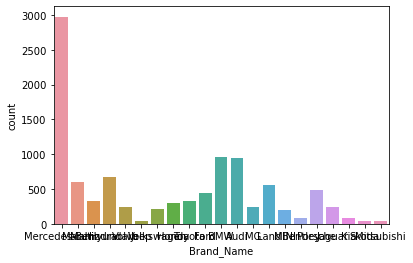

In [48]:
sns.countplot(df['Brand_Name'])

<AxesSubplot:xlabel='Car_Name', ylabel='count'>

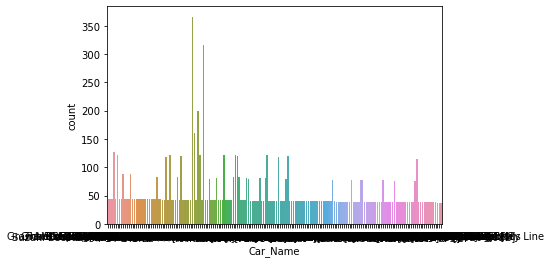

In [49]:
sns.countplot(df['Car_Name'])

<AxesSubplot:xlabel='EMI Amount', ylabel='count'>

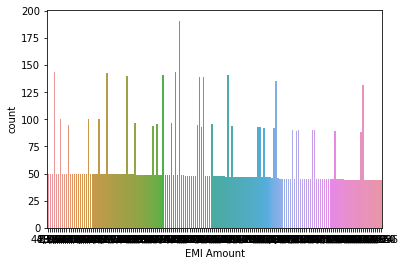

In [50]:
sns.countplot(df['EMI Amount'])

In [51]:
df.describe()

,Year
count,10000.000000
mean,2017.259500
std,3.204432
min,2007.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2022.000000


In [52]:
#Encoding the object data type
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [53]:
enc= LabelEncoder()

In [54]:
#Encoding the object data type into int data type
columns=['Year','Kilometers','Fuel','Location','Price','Brand_Name','Car_Name','EMI Amount']
df[columns] = df[columns].apply(enc.fit_transform) 

In [55]:
df

,Year,Kilometers,Fuel,Location,Price,Brand_Name,Car_Name,EMI Amount
0,8,115,1,3,74,14,99,91
1,12,53,2,3,134,13,143,145
2,10,19,2,1,109,13,146,140
3,14,74,1,1,41,12,150,60
4,5,87,2,4,48,5,67,62
...,...,...,...,...,...,...,...,...
9995,15,37,2,3,168,11,48,67
9996,15,122,2,3,84,0,18,107
9997,12,15,2,3,135,10,94,60
9998,10,133,1,1,82,6,168,16


In [56]:
df.describe()

,Year,Kilometers,Fuel,Location,Price,Brand_Name,Car_Name,EMI Amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,10.259500,60.314000,1.454300,1.256400,96.725400,9.611900,85.52490,82.761000
std,3.204432,38.067959,0.515304,0.922466,55.044131,6.059798,49.52207,48.672045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,8.000000,26.000000,1.000000,1.000000,48.000000,4.000000,48.00000,40.000000
50%,11.000000,56.000000,1.000000,1.000000,99.000000,12.000000,82.00000,85.000000
75%,13.000000,92.000000,2.000000,1.000000,142.000000,14.000000,126.00000,127.000000
max,15.000000,134.000000,2.000000,4.000000,191.000000,20.000000,178.00000,165.000000


Lets drop more than 17 lakhs

<AxesSubplot:xlabel='Price', ylabel='Density'>

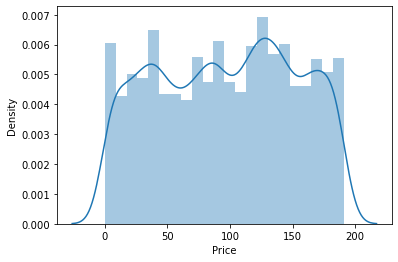

In [57]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Kilometers', ylabel='Density'>

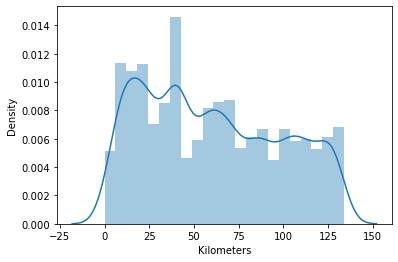

In [58]:
sns.distplot(df['Kilometers'])

In [59]:
df[df['Price']>20]

,Year,Kilometers,Fuel,Location,Price,Brand_Name,Car_Name,EMI Amount
0,8,115,1,3,74,14,99,91
1,12,53,2,3,134,13,143,145
2,10,19,2,1,109,13,146,140
3,14,74,1,1,41,12,150,60
4,5,87,2,4,48,5,67,62
...,...,...,...,...,...,...,...,...
9995,15,37,2,3,168,11,48,67
9996,15,122,2,3,84,0,18,107
9997,12,15,2,3,135,10,94,60
9998,10,133,1,1,82,6,168,16


In [60]:
df[df['Kilometers']>28]

,Year,Kilometers,Fuel,Location,Price,Brand_Name,Car_Name,EMI Amount
0,8,115,1,3,74,14,99,91
1,12,53,2,3,134,13,143,145
3,14,74,1,1,41,12,150,60
4,5,87,2,4,48,5,67,62
5,11,128,1,2,87,20,130,33
...,...,...,...,...,...,...,...,...
9991,12,32,2,3,49,14,23,59
9992,13,130,0,1,108,3,63,45
9995,15,37,2,3,168,11,48,67
9996,15,122,2,3,84,0,18,107


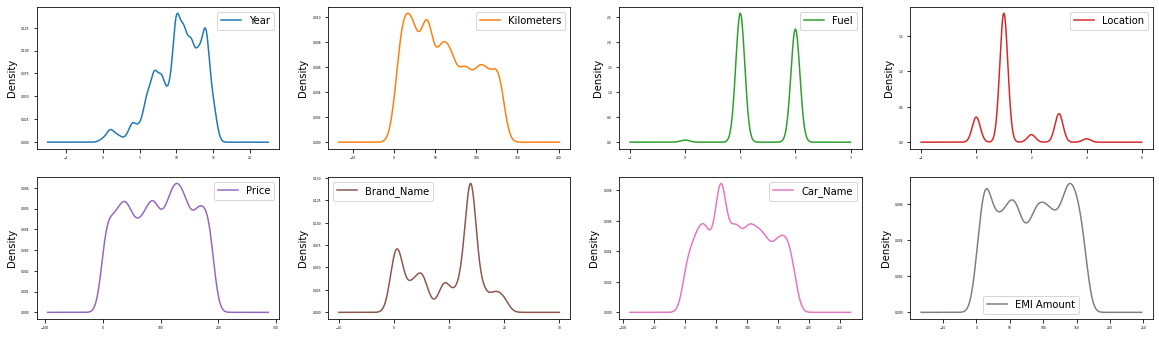

In [63]:
df.plot(kind='kde',subplots=True,layout=(4,4),sharex=False,legend=True,fontsize=3,figsize=(20,12))
plt.show()

# Skewness

In [65]:
#checking the skewness
df.skew().sort_values(ascending=False)

Location      1.135755
Kilometers    0.284349
Car_Name      0.123627
Fuel         -0.009708
EMI Amount   -0.028834
Price        -0.058699
Brand_Name   -0.304715
Year         -0.737659
dtype: float64

In [66]:
from sklearn.preprocessing import power_transform
New_df=power_transform(df)

In [68]:
#Transforming the data to reduce skewness
pd.DataFrame(New_df,columns=df.columns).skew().sort_values(ascending=False) 

Location     -0.000725
Fuel         -0.063289
Kilometers   -0.171020
Year         -0.217167
Car_Name     -0.228164
EMI Amount   -0.288356
Price        -0.299708
Brand_Name   -0.415974
dtype: float64

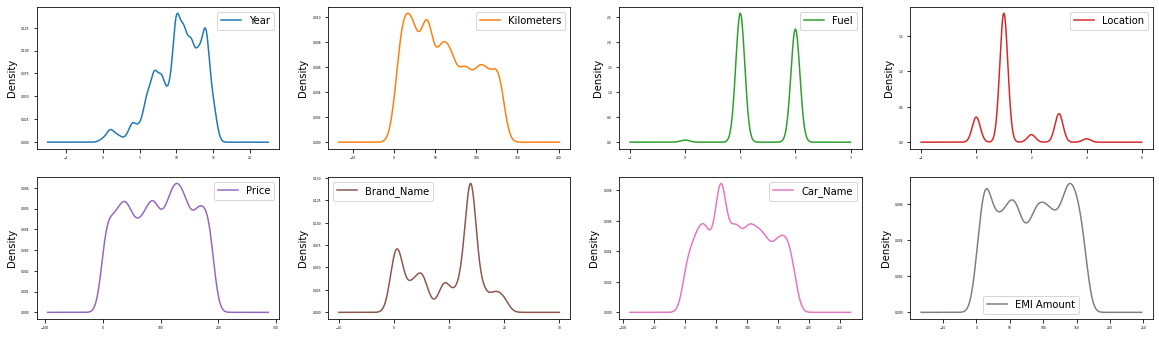

In [69]:
df.plot(kind='kde',subplots=True,layout=(4,4),sharex=False,legend=True,fontsize=3,figsize=(20,12))
plt.show()

In [37]:
#checking the skewness
cars.skew().sort_values(ascending=False)

Location      1.355319
Kilometers    0.263912
EMI           0.076528
Price         0.073129
Fuel_Type     0.045950
Car_Name     -0.203146
dtype: float64

Kilomeres is skewed lets see

In [70]:
#dividing the feature and target variable

X= df.drop('Price',axis=1)
Y= df['Price']

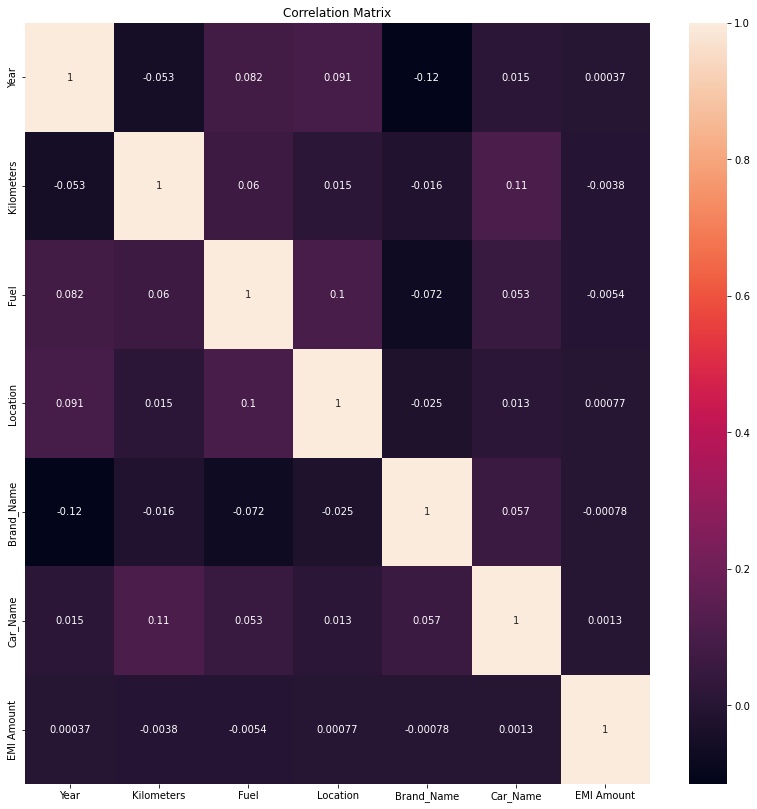

In [71]:
#Checking correlation

corr_mat=X.corr()
plt.figure(figsize=[14,14])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

seems there is no corelation

# Multicolliniarity

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Year,7.723683
1,Kilometers,3.316447
2,Fuel,7.374601
3,Location,2.839916
4,Brand_Name,3.077185
5,Car_Name,3.849392
6,EMI Amount,3.512410


# Outliers

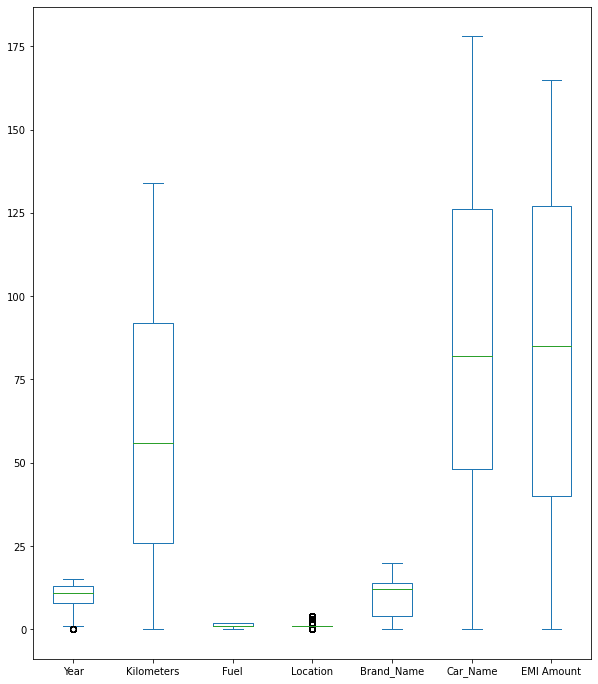

In [74]:
#cheking outliers

X.plot(kind='box',figsize=(10,12),layout=(4,3))
plt.show()

In [75]:
from scipy.stats import zscore

In [76]:
(np.abs(zscore(X)<3)).all()

Year          True
Kilometers    True
Fuel          True
Location      True
Brand_Name    True
Car_Name      True
EMI Amount    True
dtype: bool

There are no Outliers

In [77]:
Scalar=StandardScaler()
X_Scaled=Scalar.fit_transform(X)

In [78]:
X_Scaled

array([[-0.70515235,  1.43660799, -0.88165984, ...,  0.72416927,
         0.27211653,  0.16928428],
       [ 0.54318108, -0.19213969,  1.05903979, ...,  0.55913901,
         1.1606537 ,  1.27880618],
       [-0.08098563, -1.0853239 ,  1.05903979, ...,  0.55913901,
         1.22123578,  1.17607267],
       ...,
       [ 0.54318108, -1.19040439,  1.05903979, ...,  0.06404824,
         0.1711464 , -0.46766348],
       [-0.08098563,  1.90947022, -0.88165984, ..., -0.59607279,
         1.66550437, -1.37171837],
       [ 0.54318108, -1.19040439,  1.05903979, ..., -1.42122407,
        -1.70689809,  1.4431798 ]])

# Model Building

In [79]:
#Importing required libraries for model building

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC

# Linear Regression

In [80]:
LR=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=50)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)
print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 1.5831692063589142


# Decision Tree Regressor

In [81]:
DT=DecisionTreeRegressor()
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=50)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test)
print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 94.08990613751558


# Random Forest Regressor

In [82]:
rf=RandomForestRegressor()
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=50)
rf.fit(X_train,y_train)
pred_test=rf.predict(X_test)

print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 97.33440048968032


# Gradient Boosting

In [83]:
GB=GradientBoostingRegressor()
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=50)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)

print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 60.173329838952284


# Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score

# Cross Validation for Decision Tree

In [85]:
for i in range(2,6):
    DT_Val=cross_val_score(DT,X_Scaled,Y,cv=i)
    print("The cross validation score for Decision Tree Regressor",i,"is",DT_Val.mean())

The cross validation score for Decision Tree Regressor 2 is 0.9471195442675657
The cross validation score for Decision Tree Regressor 3 is 0.9491058142390715
The cross validation score for Decision Tree Regressor 4 is 0.9472857305186249
The cross validation score for Decision Tree Regressor 5 is 0.9442880339843753


# Cross Validation for Random Forest

In [86]:
for i in range(2,6):
    RF_Val=cross_val_score(rf,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is 97.14426429610899
The cross validation score for 3 is 97.06986919577894
The cross validation score for 4 is 97.03863775000755
The cross validation score for 5 is 97.00096641925711


# Cross Validation for Gradient Boost


In [87]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean()*100)

The cross validation score for 2 is 61.298861697341565
The cross validation score for 3 is 61.26259126103214
The cross validation score for 4 is 60.792473886761435
The cross validation score for 5 is 61.34166897835669


We can final RFC as our final model with 97%

# Train Test Split

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will check the best possible random state to train our model. Using LinearRegression to check and then later will run with other models.



In [89]:
MaX_r2_score=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    y_pred = lr.predict(X_test)
    r2_scores = r2_score(Y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 72 is 0.03157598097053915


We can see that the best random state is 72. We will split the data with this random state.

In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20,random_state=72)

In [91]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(X_train,Y_train)
    print(sv.score(X_train,Y_train))

-0.004607837495708145
0.011706272496282422
0.015074566907005593


In [92]:
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=191, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(X_train,Y_train)
    pred_train=m.predict(X_train)
    pred_test=m.predict(X_test)
    train_score=r2_score(Y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(Y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(Y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,X,Y,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],'Training Score':train,'Test Score':test,'Mean Square Error':Mse,'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,1.684637,3.157598,2942.564443,1.882960
1,DecisionTree,100.000000,96.257851,113.705500,95.552999
2,RandomForest,99.660131,97.929587,62.909661,97.678543
3,KNN,75.429030,53.115694,1424.583540,54.394882
4,AdaBoost,11.638068,10.493368,2719.666459,12.695733
5,GradientBoosting,61.712293,58.532693,1259.987570,60.577349
6,Lasso,1.586378,2.762384,2954.573062,1.801585
7,Ridge,1.684637,3.157389,2942.570789,1.882975


In [93]:
Performance['Difference']=Performance['Test Score']-Performance['Cross Validation Score']
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score,Difference
0,Linear Regression,1.684637,3.157598,2942.564443,1.882960,1.274638
1,DecisionTree,100.000000,96.257851,113.705500,95.552999,0.704852
2,RandomForest,99.660131,97.929587,62.909661,97.678543,0.251045
3,KNN,75.429030,53.115694,1424.583540,54.394882,-1.279188
4,AdaBoost,11.638068,10.493368,2719.666459,12.695733,-2.202365
5,GradientBoosting,61.712293,58.532693,1259.987570,60.577349,-2.044656
6,Lasso,1.586378,2.762384,2954.573062,1.801585,0.960798
7,Ridge,1.684637,3.157389,2942.570789,1.882975,1.274415


RandomForest has given us the best test accuracy of 99% with CV score of 97%

# HyperTuning

In [94]:
#Importing the libraries for Hypertuning.

from sklearn.model_selection import GridSearchCV

In [95]:
parameters1 = {'max_depth': [10, 20, 30, 40, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4, 6],
                  'min_samples_split': [2, 5, 10, 15],
                  'n_estimators': [5, 10, 20, 30, 50, 100]}

In [96]:
GCV1=GridSearchCV(RandomForestRegressor(),parameters1,cv=3)
GCV1.fit(X_train,Y_train)

print(GCV1.best_params_)

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


We will now fit the above parameters with the model.

In [97]:
Finalmod1=RandomForestRegressor(max_depth= 30, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
Finalmod1.fit(X_train,Y_train)
pred_test1=Finalmod1.predict(X_test)
RF_R2=r2_score(Y_test,pred_test1)
RF_scores=cross_val_score(Finalmod1,X,Y,cv=kf)
RF_MSE = mean_squared_error(Y_test,pred_test1)
print('RandomForestRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', RF_R2*100)
print('Cross Validation score',RF_scores.mean()*100)
print('Mean Square Error',RF_MSE)

RandomForestRegressor Performance
---------------------------------------------------
Accuracy Score 97.93006602810493
Cross Validation score 97.75068745075032
Mean Square Error 62.89511603733535


# Our model performance has increased slightly

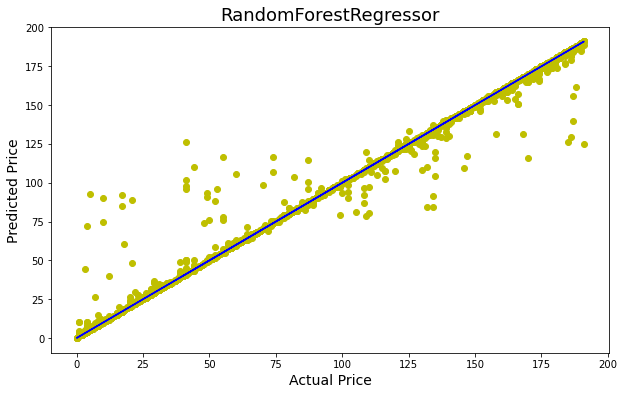

In [98]:
#Plotting the model

plt.figure(figsize=(10,6))
plt.scatter(x=Y_test,y=pred_test1,color='y')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

There is a slight improvement in the accuracy after hypertuning the model
Our model is fitting well. 

In [99]:
#lets dump the model
import joblib
joblib.dump(Finalmod1,'Car_price_prediction.obj')

['Car_price_prediction.obj']